<Figure size 800x600 with 0 Axes>

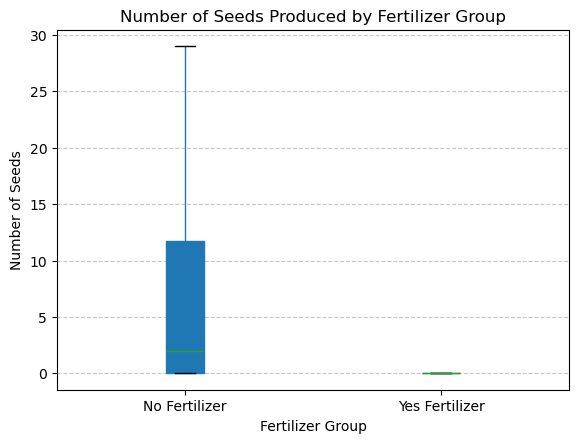

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Reload the Excel file after environment reset
file_path = "/home/jguo/ftp/upload/Seeds_Fert.xlsx"
data = pd.read_excel(file_path)
data['num_of_seeds'] = data['num_of_seeds'].fillna(0)

# Add a new column for the group (Yes Fertilizer / No Fertilizer)
data['Fertilizer Group'] = data['Fert.Mass'].apply(lambda x: 'No Fertilizer' if x == 0 else 'Yes Fertilizer')

# Create box plots
plt.figure(figsize=(8, 6))
data.boxplot(column='num_of_seeds', by='Fertilizer Group', grid=False, patch_artist=True, showfliers=False)

# Add titles and labels
plt.title('Number of Seeds Produced by Fertilizer Group')
plt.suptitle('')  # Remove the automatic subtitle
plt.xlabel('Fertilizer Group')
plt.ylabel('Number of Seeds')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


126    168.0
Name: num_of_seeds, dtype: float64


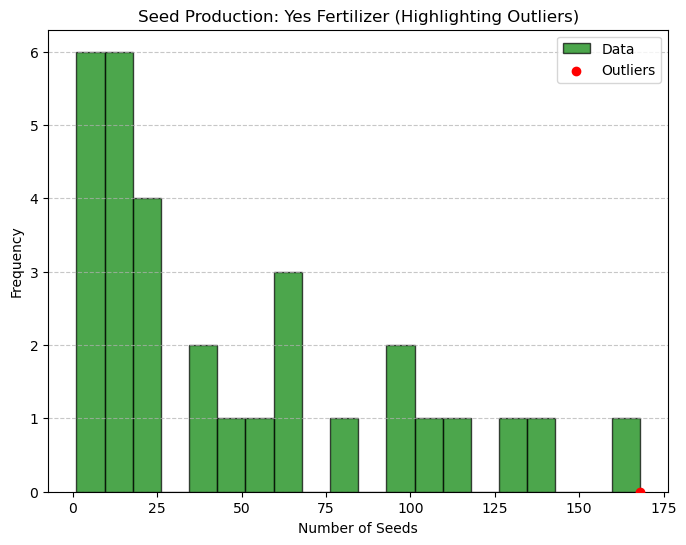

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "/home/jguo/ftp/upload/Seeds_Fert.xlsx"
data = pd.read_excel(file_path)

# Replace empty or NaN values in 'num_of_seeds' with 0
data['num_of_seeds'] = data['num_of_seeds'].fillna(0)

# Add a new column for the group (Yes Fertilizer / No Fertilizer)
data['Fertilizer Group'] = data['Fert.Mass'].apply(lambda x: 'No Fertilizer' if x == 0 else 'Yes Fertilizer')

# Function to calculate descriptive statistics
def descriptive_stats(group_data):
    stats = {
        "Mean": group_data.mean(),
        "Median": group_data.median(),
        "Standard Deviation": group_data.std(),
        "Variance": group_data.var(),
        "Minimum": group_data.min(),
        "Maximum": group_data.max(),
        "Q1 (25th Percentile)": group_data.quantile(0.25),
        "Q2 (Median)": group_data.quantile(0.50),
        "Q3 (75th Percentile)": group_data.quantile(0.75),
        "Interquartile Range (IQR)": group_data.quantile(0.75) - group_data.quantile(0.25),
        "Range": group_data.max() - group_data.min(),
    }
    return stats

# Separate data into two groups
no_fertilizer_data = data[data['Fertilizer Group'] == 'No Fertilizer']['num_of_seeds']
yes_fertilizer_data = data[data['Fertilizer Group'] == 'Yes Fertilizer']['num_of_seeds']

# Remove zero values from seed production
no_fertilizer_nonzero = no_fertilizer_data[no_fertilizer_data > 0]
yes_fertilizer_nonzero = yes_fertilizer_data[yes_fertilizer_data > 0]

# Calculate descriptive statistics for non-zero seed data
no_fertilizer_nonzero_stats = descriptive_stats(no_fertilizer_nonzero)
yes_fertilizer_nonzero_stats = descriptive_stats(yes_fertilizer_nonzero)

# Function to identify outliers using 1.5 * IQR rule
def identify_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Identify outliers for the Yes Fertilizer group
yes_fertilizer_outliers = identify_outliers(yes_fertilizer_nonzero)
print(yes_fertilizer_outliers)

# Plot histogram for Yes Fertilizer group with outliers highlighted
plt.figure(figsize=(8, 6))
plt.hist(yes_fertilizer_nonzero, bins=20, color='green', alpha=0.7, edgecolor='black', label="Data")
plt.scatter(
    yes_fertilizer_outliers,
    [0] * len(yes_fertilizer_outliers),
    color='red',
    label="Outliers",
    zorder=5,
)
plt.title('Seed Production: Yes Fertilizer (Highlighting Outliers)')
plt.xlabel('Number of Seeds')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


In [11]:


# Add a new column for the group (Yes Fertilizer / No Fertilizer)
data['Fertilizer Group'] = data['Fert.Mass'].apply(lambda x: 'No Fertilizer' if x == 0 else 'Yes Fertilizer')

# Function to calculate descriptive statistics
def descriptive_stats(group_data):
    stats = {
        "Mean": group_data.mean().round(1),
        "Median": group_data.median().round(1),
        "Standard Deviation": group_data.std().round(1),
        "Minimum": group_data.min().round(0),
        "Maximum": group_data.max().round(0),
        "Q1 (25th Percentile)": group_data.quantile(0.25).round(1),
        "Q2 (Median)": group_data.quantile(0.50).round(1),
        "Q3 (75th Percentile)": group_data.quantile(0.75).round(1),
        "Interquartile Range (IQR)": (group_data.quantile(0.75) - group_data.quantile(0.25)).round(1),
        "Range": (group_data.max() - group_data.min()).round(0),
    }
    return stats

# Separate data into two groups
no_fertilizer_data = data[data['Fertilizer Group'] == 'No Fertilizer']['num_of_seeds']
yes_fertilizer_data = data[data['Fertilizer Group'] == 'Yes Fertilizer']['num_of_seeds']

# Remove zero values from seed production
no_fertilizer_nonzero = no_fertilizer_data[no_fertilizer_data > 0]
yes_fertilizer_nonzero = yes_fertilizer_data[yes_fertilizer_data > 0]

# Calculate descriptive statistics for all data (including zeros)
no_fertilizer_stats = descriptive_stats(no_fertilizer_data)
yes_fertilizer_stats = descriptive_stats(yes_fertilizer_data)

# Calculate descriptive statistics for non-zero data
no_fertilizer_nonzero_stats = descriptive_stats(no_fertilizer_nonzero)
yes_fertilizer_nonzero_stats = descriptive_stats(yes_fertilizer_nonzero)

# Combine all statistics into DataFrames
stats_with_zeros = pd.DataFrame({
    "No Fertilizer (All)": no_fertilizer_stats,
    "Yes Fertilizer (All)": yes_fertilizer_stats
})

stats_nonzero = pd.DataFrame({
    "No Fertilizer (Non-Zero)": no_fertilizer_nonzero_stats,
    "Yes Fertilizer (Non-Zero)": yes_fertilizer_nonzero_stats
})

# Output as separate DataFrames for clarity
print("Descriptive Statistics (Including Zeros):")
print(stats_with_zeros)
print("\nDescriptive Statistics (Non-Zero Data Only):")
print(stats_nonzero)


Descriptive Statistics (Including Zeros):
                           No Fertilizer (All)  Yes Fertilizer (All)
Mean                                       9.8                  10.6
Median                                     2.0                   0.0
Standard Deviation                        15.0                  29.7
Minimum                                    0.0                   0.0
Maximum                                   50.0                 168.0
Q1 (25th Percentile)                       0.0                   0.0
Q2 (Median)                                2.0                   0.0
Q3 (75th Percentile)                      11.8                   0.0
Interquartile Range (IQR)                 11.8                   0.0
Range                                     50.0                 168.0

Descriptive Statistics (Non-Zero Data Only):
                           No Fertilizer (Non-Zero)  Yes Fertilizer (Non-Zero)
Mean                                           18.7                       

/tmp/ipykernel_2164043/512767125.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  zero_seed_range_counts = yes_fertilizer_data[yes_fertilizer_data['num_of_seeds'] == 0].groupby(fert_mass_bins).size()
/tmp/ipykernel_2164043/512767125.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_range_counts = yes_fertilizer_data.groupby(fert_mass_bins).size()


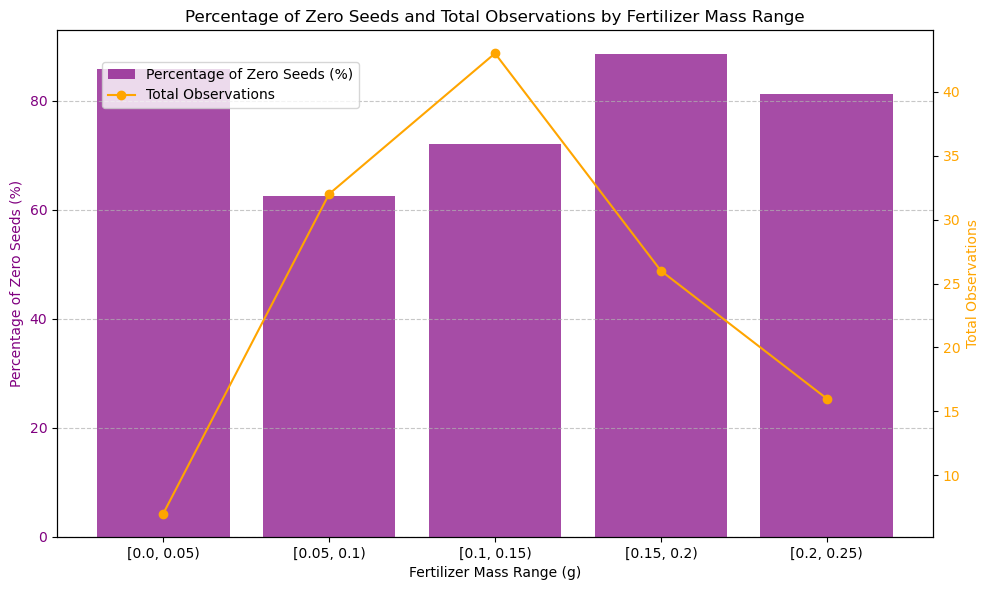

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


# Add a new column for the group (Yes Fertilizer / No Fertilizer)
data['Fertilizer Group'] = data['Fert.Mass'].apply(lambda x: 'No Fertilizer' if x == 0 else 'Yes Fertilizer')

# Filter data for the Yes Fertilizer group
yes_fertilizer_data = data[data['Fertilizer Group'] == 'Yes Fertilizer']

# Define fertilizer mass ranges (bins)
fert_mass_bins = pd.cut(yes_fertilizer_data['Fert.Mass'], bins=[0, 0.05, 0.1, 0.15, 0.2, 0.25], right=False)

# Count the number of zero seeds in each range
zero_seed_range_counts = yes_fertilizer_data[yes_fertilizer_data['num_of_seeds'] == 0].groupby(fert_mass_bins).size()

# Count total observations in each fertilizer mass range
total_range_counts = yes_fertilizer_data.groupby(fert_mass_bins).size()

# Calculate the percentage of zero seeds in each range
zero_seed_pct = (zero_seed_range_counts / total_range_counts) * 100

# Plot the percentage of zero seeds along with total observations for each range
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot percentage of zero seeds
ax1.bar(zero_seed_pct.index.astype(str), zero_seed_pct.values, color='purple', alpha=0.7, label='Percentage of Zero Seeds (%)')
ax1.set_ylabel('Percentage of Zero Seeds (%)', color='purple')
ax1.set_xlabel('Fertilizer Mass Range (g)')
ax1.tick_params(axis='y', labelcolor='purple')
ax1.set_title('Percentage of Zero Seeds and Total Observations by Fertilizer Mass Range')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Add a secondary y-axis for total observations
ax2 = ax1.twinx()
ax2.plot(zero_seed_pct.index.astype(str), total_range_counts.values, color='orange', marker='o', label='Total Observations')
ax2.set_ylabel('Total Observations', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add legends
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.xticks(rotation=45)
plt.show()


In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf

# Load the data
file_path = "/home/jguo/ftp/upload/Seeds_Fert.xlsx"
df = pd.read_excel(file_path)

# Print column names for debugging
print(df.columns)

# --- 1. Data Preparation ---
df['Germinated'] = np.where(df['num_of_seeds'].isna(), 0, 1)
df_fertilized = df[df['Fert.Mass'] > 0]
df_no_fertilizer = df[df['Fert.Mass'] == 0]

print("--- Data Preparation ---")
print(f"Total number of observations: {len(df)}")
print(f"Number of observations with fertilizer: {len(df_fertilized)}")
print(f"Number of observations without fertilizer: {len(df_no_fertilizer)}")
print("\n")

# --- 2. Germination Analysis ---
print("--- 2. Germination Analysis ---")

# Overall Germination Rate
overall_germination_rate = df['Germinated'].mean() * 100
print(f"Overall Germination Rate: {overall_germination_rate:.2f}%")

# Germination Rate by Group
germination_rate_fertilized = df_fertilized['Germinated'].mean() * 100
germination_rate_no_fertilizer = df_no_fertilizer['Germinated'].mean() * 100
print(f"Germination Rate (Fertilizer): {germination_rate_fertilized:.2f}%")
print(f"Germination Rate (No Fertilizer): {germination_rate_no_fertilizer:.2f}%")

# Chi-squared test for independence of fertilization and germination
observed = pd.crosstab(df['Fert.Mass'] > 0, df['Germinated'])
chi2, p, _, _ = stats.chi2_contingency(observed)
print(f"Chi-squared test for Germination vs. Fertilizer: Chi2 = {chi2:.2f}, p = {p:.3f}")

# Logistic Regression
if not df['Fert.Mass'].nunique() == 1: # Avoid error if only one unique value
    model_germination = smf.logit('Germinated ~ Fert.Mass', data=df).fit()
    print("\nLogistic Regression for Germination:")
    print(model_germination.summary())
else:
    print("\nSkipping Logistic Regression for Germination: Only one unique value in Fert.Mass.")

print("\n")

# --- 3. Seed Production Analysis (Among Germinated Plants) ---
df_germinated = df.dropna(subset=['num_of_seeds'])
df_germinated_fertilized = df_germinated[df_germinated['Fert.Mass'] > 0]
df_germinated_no_fertilizer = df_germinated[df_germinated['Fert.Mass'] == 0]

print("--- 3. Seed Production Analysis (Among Germinated Plants) ---")

print("\n--- Including germinated plants with zero seeds ---")
print("Seed Production (including zeros):")
print(f"Mean Seeds (Fertilizer): {df_germinated_fertilized['num_of_seeds'].mean():.2f}")
print(f"Mean Seeds (No Fertilizer): {df_germinated_no_fertilizer['num_of_seeds'].mean():.2f}")

# T-test or Mann-Whitney (checking for normality visually or with Shapiro-Wilk)
if len(df_germinated_fertilized) > 1 and len(df_germinated_no_fertilizer) > 1:
    shapiro_fertilized = stats.shapiro(df_germinated_fertilized['num_of_seeds'])
    shapiro_no_fertilizer = stats.shapiro(df_germinated_no_fertilizer['num_of_seeds'])
    print(f"Shapiro-Wilk test (Fertilizer): Statistic = {shapiro_fertilized.statistic:.3f}, p = {shapiro_fertilized.pvalue:.3f}")
    print(f"Shapiro-Wilk test (No Fertilizer): Statistic = {shapiro_no_fertilizer.statistic:.3f}, p = {shapiro_no_fertilizer.pvalue:.3f}")

    if shapiro_fertilized.pvalue > 0.05 and shapiro_no_fertilizer.pvalue > 0.05:
        ttest = stats.ttest_ind(df_germinated_fertilized['num_of_seeds'], df_germinated_no_fertilizer['num_of_seeds'], equal_var=False) # Assuming unequal variances
        print(f"T-test for Seed Production (including zeros): t = {ttest.statistic:.3f}, p = {ttest.pvalue:.3f}")
    else:
        mwu = stats.mannwhitneyu(df_germinated_fertilized['num_of_seeds'], df_germinated_no_fertilizer['num_of_seeds'], alternative='two-sided')
        print(f"Mann-Whitney U test for Seed Production (including zeros): U = {mwu.statistic:.3f}, p = {mwu.pvalue:.3f}")
else:
    print("Cannot perform statistical tests for seed production (including zeros) due to insufficient data in one or both groups.")

# Regression (including zeros)
if not df_germinated['Fert.Mass'].nunique() == 1:
    model_seeds_incl_zero_linear = smf.ols('num_of_seeds ~ Fert.Mass', data=df_germinated).fit()
    print("\nLinear Regression for Seed Production (including zeros):")
    print(model_seeds_incl_zero_linear.summary())

    model_seeds_incl_zero_poly = smf.ols('num_of_seeds ~ Fert.Mass + I(Fert.Mass**2)', data=df_germinated).fit()
    print("\nPolynomial Regression for Seed Production (including zeros):")
    print(model_seeds_incl_zero_poly.summary())
else:
    print("\nSkipping Regression for Seed Production (including zeros): Only one unique value in Fert.Mass among germinated plants.")

print("\n--- Excluding germinated plants with zero seeds ---")
df_germinated_positive_seeds = df_germinated[df_germinated['num_of_seeds'] > 0]
df_germinated_positive_seeds_fertilized = df_germinated_positive_seeds[df_germinated_positive_seeds['Fert.Mass'] > 0]
df_germinated_positive_seeds_no_fertilizer = df_germinated_positive_seeds[df_germinated_positive_seeds['Fert.Mass'] == 0]

print("Seed Production (excluding zeros):")
if not df_germinated_positive_seeds_fertilized.empty:
    print(f"Mean Seeds (Fertilizer): {df_germinated_positive_seeds_fertilized['num_of_seeds'].mean():.2f}")
if not df_germinated_positive_seeds_no_fertilizer.empty:
    print(f"Mean Seeds (No Fertilizer): {df_germinated_positive_seeds_no_fertilizer['num_of_seeds'].mean():.2f}")

# T-test or Mann-Whitney (checking for normality)
if len(df_germinated_positive_seeds_fertilized) > 1 and len(df_germinated_positive_seeds_no_fertilizer) > 1:
    shapiro_pos_fertilized = stats.shapiro(df_germinated_positive_seeds_fertilized['num_of_seeds'])
    shapiro_pos_no_fertilizer = stats.shapiro(df_germinated_positive_seeds_no_fertilizer['num_of_seeds'])
    print(f"Shapiro-Wilk test (Fertilizer, positive seeds): Statistic = {shapiro_pos_fertilized.statistic:.3f}, p = {shapiro_pos_fertilized.pvalue:.3f}")
    print(f"Shapiro-Wilk test (No Fertilizer, positive seeds): Statistic = {shapiro_pos_no_fertilizer.statistic:.3f}, p = {shapiro_pos_no_fertilizer.pvalue:.3f}")

    if shapiro_pos_fertilized.pvalue > 0.05 and shapiro_pos_no_fertilizer.pvalue > 0.05:
        ttest_pos = stats.ttest_ind(df_germinated_positive_seeds_fertilized['num_of_seeds'], df_germinated_positive_seeds_no_fertilizer['num_of_seeds'], equal_var=False)
        print(f"T-test for Seed Production (excluding zeros): t = {ttest_pos.statistic:.3f}, p = {ttest_pos.pvalue:.3f}")
    else:
        mwu_pos = stats.mannwhitneyu(df_germinated_positive_seeds_fertilized['num_of_seeds'], df_germinated_positive_seeds_no_fertilizer['num_of_seeds'], alternative='two-sided')
        print(f"Mann-Whitney U test for Seed Production (excluding zeros): U = {mwu_pos.statistic:.3f}, p = {mwu_pos.pvalue:.3f}")
elif not df_germinated_positive_seeds_fertilized.empty and not df_germinated_positive_seeds_no_fertilizer.empty:
    print("Cannot perform statistical tests for seed production (excluding zeros) due to insufficient data in one or both groups.")
else:
    print("Cannot perform statistical tests for seed production (excluding zeros) as one or both groups are empty.")

# Regression (excluding zeros)
if not df_germinated_positive_seeds['Fert.Mass'].nunique() == 1 and len(df_germinated_positive_seeds) > 0:
    model_seeds_excl_zero_linear = smf.ols('num_of_seeds ~ Fert.Mass', data=df_germinated_positive_seeds).fit()
    print("\nLinear Regression for Seed Production (excluding zeros):")
    print(model_seeds_excl_zero_linear.summary())

    model_seeds_excl_zero_poly = smf.ols('num_of_seeds ~ Fert.Mass + I(Fert.Mass**2)', data=df_germinated_positive_seeds).fit()
    print("\nPolynomial Regression for Seed Production (excluding zeros):")
    print(model_seeds_excl_zero_poly.summary())
else:
    print("\nSkipping Regression for Seed Production (excluding zeros): Either only one unique value in Fert.Mass or no data.")

print("\n--- 4. Overall Comparison and Conclusions ---")
print("Based on the analysis:")
print(f"- Germination rate with fertilizer: {germination_rate_fertilized:.2f}% vs. without: {germination_rate_no_fertilizer:.2f}%.")
if p < 0.05:
    print("- The difference in germination rates between the groups is statistically significant (p < 0.05).")
else:
    print("- There is no statistically significant difference in germination rates between the groups.")

if len(df_germinated_fertilized) > 0 and len(df_germinated_no_fertilizer) > 0:
    mean_seeds_fertilized_incl_zero = df_germinated_fertilized['num_of_seeds'].mean()
    mean_seeds_no_fertilizer_incl_zero = df_germinated_no_fertilizer['num_of_seeds'].mean()
    print(f"- Mean seed production (including zeros) with fertilizer: {mean_seeds_fertilized_incl_zero:.2f} vs. without: {mean_seeds_no_fertilizer_incl_zero:.2f}.")

if len(df_germinated_positive_seeds_fertilized) > 0 and len(df_germinated_positive_seeds_no_fertilizer) > 0:
    mean_seeds_fertilized_excl_zero = df_germinated_positive_seeds_fertilized['num_of_seeds'].mean()
    mean_seeds_no_fertilizer_excl_zero = df_germinated_positive_seeds_no_fertilizer['num_of_seeds'].mean()
    print(f"- Mean seed production (excluding zeros) with fertilizer: {mean_seeds_fertilized_excl_zero:.2f} vs. without: {mean_seeds_no_fertilizer_excl_zero:.2f}.")

print("\nFurther analysis of regression models can provide insights into the relationship between fertilizer mass and seed production.")

Index(['Fert.Mass', 'num_of_seeds'], dtype='object')
--- Data Preparation ---
Total number of observations: 187
Number of observations with fertilizer: 139
Number of observations without fertilizer: 48


--- 2. Germination Analysis ---
Overall Germination Rate: 55.61%
Germination Rate (Fertilizer): 49.64%
Germination Rate (No Fertilizer): 72.92%
Chi-squared test for Germination vs. Fertilizer: Chi2 = 6.92, p = 0.009


PatsyError: Error evaluating factor: NameError: name 'Fert' is not defined
    Germinated ~ Fert.Mass
                 ^^^^^^^^^